In [1]:
#load all the required libraries
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
df_train = pd.read_csv("C:/Users/dell/Downloads/data_and_questions/data/train.csv")
df_test = pd.read_csv("C:/Users/dell/Downloads/data_and_questions/data/test.csv")

In [3]:
df_train.head()

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."


In [4]:
df_train.condition.value_counts()

Birth Control                                            353
Depression                                               139
Pain                                                      88
Acne                                                      72
Anxiety                                                   67
                                                        ... 
Tinnitus                                                   1
Alopecia                                                   1
Premature Ventricular Depolarizations                      1
Methicillin-Resistant Staphylococcus Aureus Infection      1
Hereditary Angioedema                                      1
Name: condition, Length: 264, dtype: int64

In [5]:
df_train1 = df_train[(df_train['condition'] == 'Birth Control') |
                     (df_train['condition'] == 'Depression') |
                     (df_train['condition'] == 'High Blood Pressure')]

In [6]:
df_train.shape

(161296, 4)

In [7]:
df_train1.shape

(520, 4)

In [8]:
print(df_train1.columns)

Index(['uniqueID', 'drugName', 'condition', 'review'], dtype='object')


In [138]:
print(df_train.isnull().sum())

uniqueID     159303
drugName     159297
condition    159308
review       159305
dtype: int64


In [12]:
X = df_train1.drop(['uniqueID', 'drugName'],axis=1)

# EDA

In [13]:
X.condition.value_counts()

Birth Control          353
Depression             139
High Blood Pressure     28
Name: condition, dtype: int64

In [14]:
X.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
14,Birth Control,"""Started Nexplanon 2 months ago because I have..."


In [15]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

Text(0.5, 1.0, 'Word cloud for Birth control')

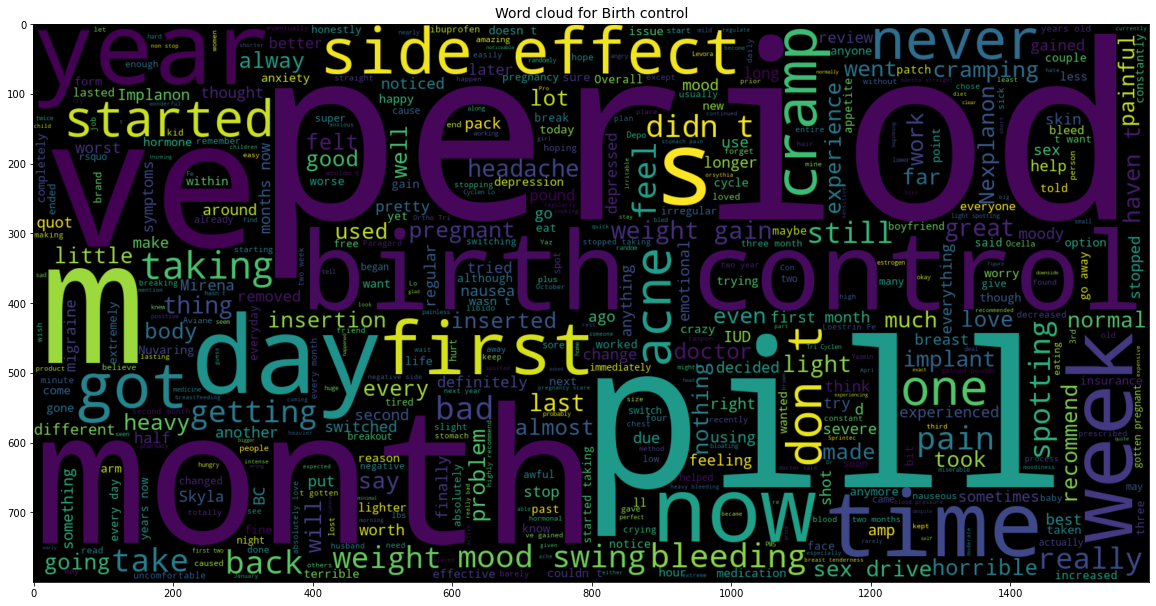

In [17]:
from wordcloud import WordCloud

# Convert non-string values in 'review' column to strings
X_birth['review'] = X_birth['review'].astype(str)

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_birth['review']))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Birth control', fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

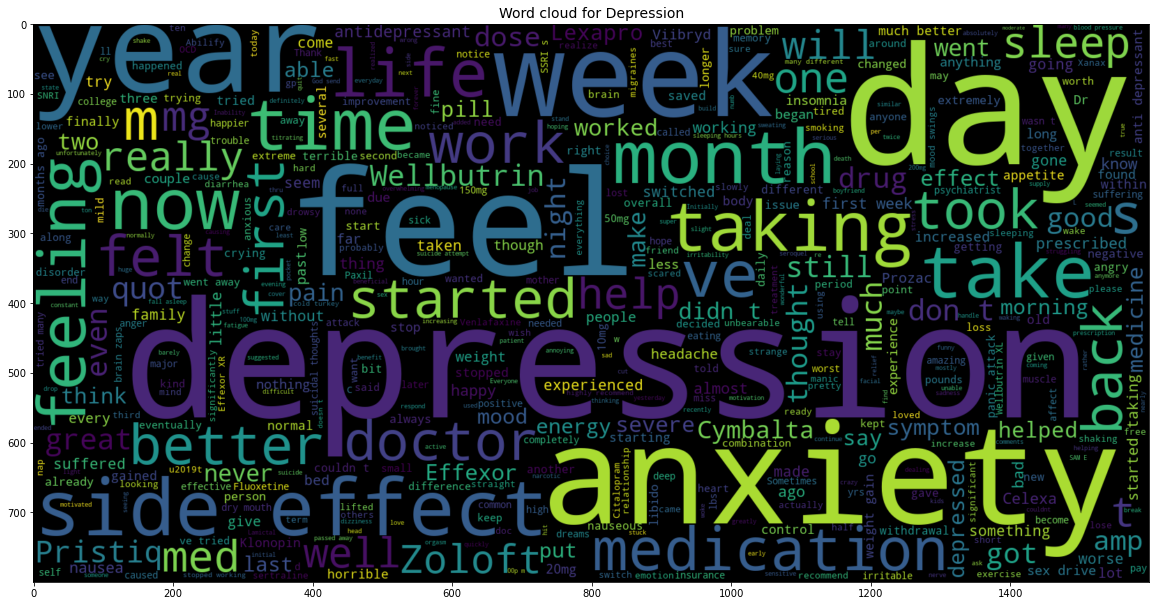

In [18]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

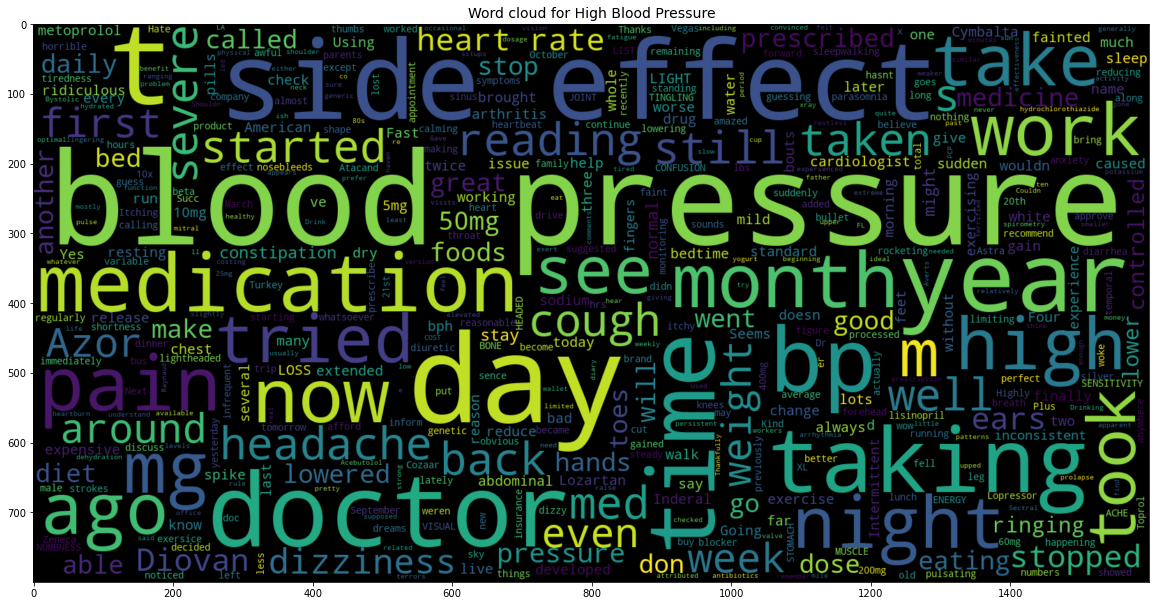

In [19]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

In [21]:
print("Number of reviews for Diabetes Type 2:", len(X_diab['review']))

Number of reviews for Diabetes Type 2: 0


# Data preprocessing

In [30]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [31]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [32]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [33]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

In [34]:
X.head()

,condition,review
2,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."
3,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"
9,Birth Control,"I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
14,Birth Control,"Started Nexplanon 2 months ago because I have a minimal amount of contraception&#039;s I can take due to my inability to take the hormone that is used in most birth controls. I&#039;m trying to give it time because it is one of my only options right now. But honestly if I had options I&#039;d get it removed.\r\nI&#039;ve never had acne problems in my life, and immediately broke out after getting it implanted. Sex drive is completely gone, and I used to have sex with my boyfriend a few days a week, now its completely forced and not even fun for me anymore. I mean I&#039;m on birth control because I like having sex but don&#039;t want to get pregnant, why take a birth control that takes away sex? Very unhappy and hope that I get it back with time or I&#039;m getting it removed."


## What are stopwords ?
### Stopwords are the most common words in any natural language. For the purpose of building NLP models, these stopwords might not add much value to the meaning of the document.

#### The most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.

In [35]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [36]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Lemmitization

In [38]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [39]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [40]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [41]:
from bs4 import BeautifulSoup
import re

In [111]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review).get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    words = letters_only.lower().split()
    meaningful_words = [w for w in words if not w in stop]
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    return( ' '.join(lemmitize_words))

In [112]:
# Replace missing values with an empty string
X['review'] = X['review'].fillna('')

# Apply the review_to_words function
X['review_clean'] = X['review'].apply(review_to_words)

In [113]:
X.head()

,condition,review,review_clean
2,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.",used take another oral contraceptive pill cycle happy light period max day side effect contained hormone gestodene available u switched lybrel ingredient similar pill ended started lybrel immediately first day period instruction said period lasted two week taking second pack two week third pack thing got even worse third period lasted two week end third week still daily brown discharge positive side side effect idea period free tempting ala
3,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch",first time using form birth control glad went patch month first decreased libido subsided downside made period longer day exact used period day max also made cramp intense first two day period never cramp using birth control happy patch
9,Birth Control,"I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.",pill many year doctor changed rx chateal effective really help completely clearing acne take month though gain extra weight develop emotional health issue stopped taking bc started using natural method birth control started take bc hate acne came back age really hope symptom like depression weight gain begin affect older also naturally moody may worsen thing negative mental rut today also hope push edge believe depressed hopefully like younger
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
14,Birth Control,"Started Nexplanon 2 months ago because I have a minim

## some statistics and visualizations to summarize the distribution of categories 

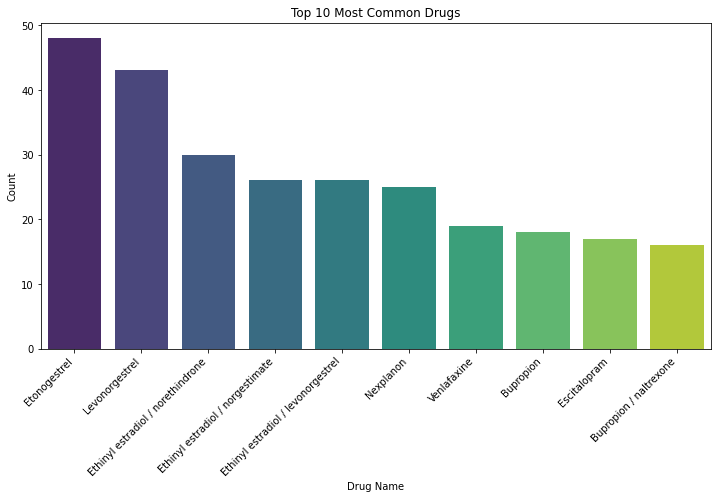

In [148]:
# Count the occurrences of each drug category
drug_counts = df_train['drugName'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=drug_counts.index, y=drug_counts.values, palette="viridis")
plt.title('Top 10 Most Common Drugs')
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [149]:
# Check class distribution
df_train['drugName'].value_counts()

Etonogestrel                          48
Levonorgestrel                        43
Ethinyl estradiol / norethindrone     30
Ethinyl estradiol / norgestimate      26
Ethinyl estradiol / levonorgestrel    26
                                      ..
Camphor / menthol                     1 
Minoxidil                             1 
Invega                                1 
Rythmol SR                            1 
Epclusa                               1 
Name: drugName, Length: 717, dtype: int64

### Creating features and Target Variable

In [114]:
X_feat=X['review_clean']
y=X['condition']

In [115]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, stratify=y, test_size=0.2, random_state=0)

In [116]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Bag of Words

In [117]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [118]:
count_train

<416x2459 sparse matrix of type '<class 'numpy.int64'>'
	with 12910 stored elements in Compressed Sparse Row format>

## Machine Learning Model : Naive Bayes

accuracy:   0.962
Confusion matrix, without normalization


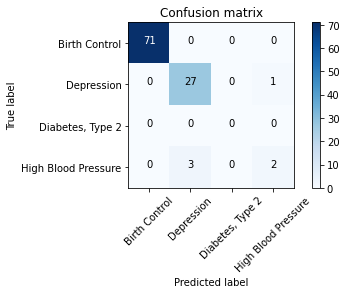

In [119]:
from sklearn.naive_bayes import MultinomialNB
import itertools

mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Machine Learning Model : Passive Aggressive Classifier

accuracy:   0.933
Confusion matrix, without normalization


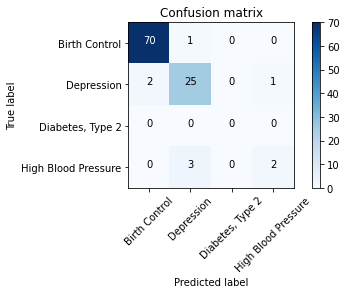

In [120]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## TFIDF

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Machine Learning Model : Naive Bayes

accuracy:   0.779
Confusion matrix, without normalization


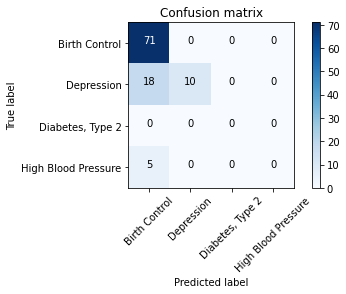

In [122]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Machine Learning Model TFIDF

accuracy:   0.952
Confusion matrix, without normalization


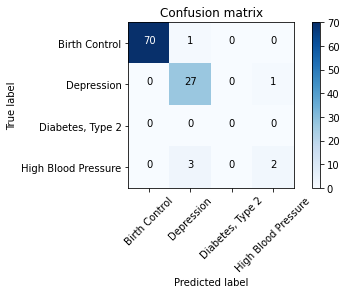

In [123]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## TFIDF: Bigrams

In [124]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.952
Confusion matrix, without normalization


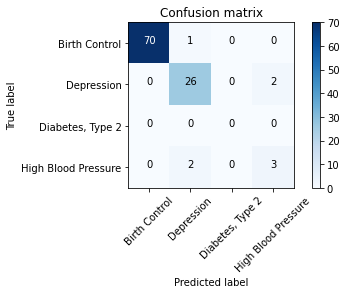

In [125]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## TFIDF : Trigrams

accuracy:   0.923
Confusion matrix, without normalization


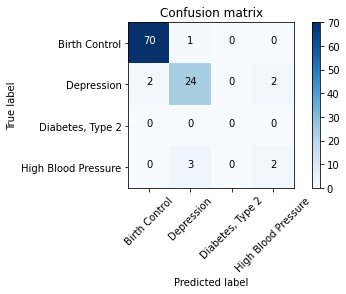

In [126]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

### Most important Features

In [127]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Birth Control')

Birth Control worst pain 0.8773801031184045
Birth Control breakthrough bleeding 0.9079515689811055
Birth Control used period 0.9978217366056323
Birth Control problem low 1.0049482251890465
Birth Control convinced try 1.3598374837146154
Birth Control finally removed 1.4098637834730716
Birth Control extended 1.4533478811296627
Birth Control active 1.4780274864572647
Birth Control conscious 1.7303175438732215
Birth Control confusion visual 1.766849805762493


In [128]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Depression')

Depression color week 0.9515538551222146
Depression jolt 0.9607050665628816
Depression away painful 0.9768242802704913
Depression lot mind 1.0623495772721978
Depression nervous 1.1062094775521096
Depression unhappy 1.1310197803126514
Depression lead panic 1.239916861149996
Depression getting asap 1.4272451046135093
Depression awhile wait 1.9558616180363397
Depression hoping result 2.5892012053705984


In [129]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'High Blood Pressure')

High Blood Pressure level dropped 0.5217009302843365
High Blood Pressure level experienced 0.5217009302843365
High Blood Pressure pimple bad 0.5217009302843365
High Blood Pressure pimple changed 0.5217009302843365
High Blood Pressure say acute 0.5389335902416459
High Blood Pressure say everybody 0.6302408908774916
High Blood Pressure feeling hopelessness 0.6321852857125582
High Blood Pressure cramping painful 1.0200333118673237
High Blood Pressure day major 1.1962759437059083
High Blood Pressure crazy depressed 1.337373473032152


## Sample Predictions

In [130]:
X.tail()

,condition,review,review_clean
1983,Depression,Its early days but I have over the last 12 months tried mirtazapine and citalpram. I&#039;m currently on a low dose but I suspect my GP will want to up my dose.,early day last month tried mirtazapine citalpram currently low dose suspect gp want dose
1988,Birth Control,"My doctor gave me an 800 mg Ibuprofen about an hour before insertion. While they attempted to insert the Mirena (which I had originally planned on getting) I experienced horrible pain for nearly 10 minutes. I&#039;m 20 and have never had children and it was one of the most painful experiences of my entire life. I usually have very painful period cramps and this still felt much worse. Finally, they asked if I&#039;d rather have the Skyla, which is smaller and might accommodate my tiny cervix better. In comparison, the Skyla insertion was much quicker and less painful. After the procedure I did throw up once due to the intense pain, but after a few days I experienced little to no side effects. I do recommend taking the day off of work though.",doctor gave mg ibuprofen hour insertion attempted insert mirena originally planned getting experienced horrible pain nearly minute never child one painful experience entire life usually painful period cramp still felt much worse finally asked rather skyla smaller might accommodate tiny cervix better comparison skyla insertion much quicker le painful procedure throw due intense pain day experienced little side effect recommend taking day work though
1989,Birth Control,"I&#039;m 18 going to be 19 soon. I had really heavy periods for 8 days straight and my period would come a week early. It was regular just less than a month until each one and I also had really bad cramps to the point where I couldn&#039;t move. The pill was my first option and it made me bleed for 3 months straight. A while later I was considering birth control and I finally chose the Depo-Provera, it was the perfect choice for me. Once I got the shot I never got a period/any bleeding again. I personally didn&#039;t gain any weight. All the side effects didn&#039;t bother me. And works well against pregnancy. I&#039;ve saw a lot of bad reviews but mine was perfect so everyone&#039;s body is different. I would recommend talking to your doctor. He/she will know what&#039;s best.",going soon really heavy period day straight period would come week early regular le month one also really bad cramp point move pill first option made bleed month straight later considering birth control finally chose depo provera perfect choice got shot never got period bleeding personally gain weight side effect bother work well pregnancy saw lot bad review mine perfect everyone body different would recommend talking doctor know best
1995,Depression,"My doctor prescribed 37.5 mg to me. I took one at 3:00p.m. and by 7:00p.m. I was feeling dizzy and nauseous. I actually was able to fall asleep but woke up several times during the night with horrible nausea, shaking, anxiety, weird dreams, and the a lot of gas! Thank goodness I had Zofran for nausea or I would have thrown up. I also had to take an Ativan for the anxiety and Imodium for diarrhea. It&#039;s now 5:00p.m. the next day and I&#039;m just now feeling better. I know others who use Effexor and love it so it does work for some....just not for me. I called the doc and she quickly switched me to something else.",doctor prescribed mg took one p p feeling dizzy nauseous actually able fall asleep woke several time night horrible nausea shaking anxiety weird dream lot gas thank goodness zofran nausea would thrown also take ativan anxiety imodium diarrhea p next day feeling better know others use effexor love work called doc quickly switched something else
1997,Depression,"Effexor has been the most effective antidepressant for me. I&#039;ve tried 5 SSRI&#039;s. Effexor doesn&#039;t make me lazy or spaced out. I feel it helps my cognitive functioning, as well as focus, motivation and memory. I

In [131]:
def top_drugs_extractor(condition):
    df_top = df_train[df_train['condition'] == condition].sort_values(by='uniqueID', ascending=False)
    drug_lst = df_top['drugName'].head(3).tolist()
    return drug_lst

In [132]:
def predict_text(lst_text):
    df_test1 = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test1["test_sent"] = df_test1["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test1['prediction']=prediction
    return df_test1

In [133]:
sentences = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
    
  ]

In [134]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)


predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Diabetes, Type 2":
        target="Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    else:
        target="Birth Control"
        print("text:", text, "\Condition:", target)
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. \Condition: Birth Control
text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: Birth Control
Top 3 Suggested Drugs:
Depo-Provera
Etonogestrel
Etonogestrel

text: This 

In [135]:
df_testsent = predict_text(sentences)
df_testsent

,test_sent,prediction
0,tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced diovan ugly drug opinion company produce however palpitation pretty bad diovan hour monitor ekg etc day substituting tekturna diovan palpitation,Birth Control
1,third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap,Depression
2,got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine,Birth Control


In [136]:
import joblib
joblib.dump(tfidf_vectorizer3, 'tfidfvectorizer.pkl')
joblib.dump(pass_tf, 'passmodel.pkl')

['passmodel.pkl']

In [137]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations"]))
test[0]

'Birth Control'